## Getting Started with Jarjarquant
---

This notebook demonstrates how to use the Jarjarquant library for quantitative trading analysis. Jarjarquant provides tools for accessing market data, calculating technical indicators, and analyzing trading strategies.

### Setup
First, we'll import the Jarjarquant library and set up our environment. We're using `nest_asyncio` to allow running async code in the notebook.

In [1]:
# Import Jarjarquant and nest_asyncio for running async code in notebook
from jarjarquant import Jarjarquant
import nest_asyncio
import pandas as pd
nest_asyncio.apply()  # Apply nest_asyncio to allow running async code in Jupyter

# Initialize Jarjarquant with TWS (Interactive Brokers Trader Workstation) as data source
jjq = Jarjarquant(data_frame=pd.DataFrame())

### Examining the Data
Let's look at the initial data frame to see what market data we have available.

In [2]:
# Display the first few rows of the dataframe to see available market data
jjq.df.head()

""


### Fetching Data from TWS

In [3]:
# Fetching Stock Data
jjq.data_gatherer.get_tws_ticker(ticker="SPY", duration="1 Y",  end_date="2020-01-01").head()

,date,Open,High,Low,Close,Volume,average,barCount
date,,,,,,,,
2019-01-02,2019-01-02,245.98,251.21,245.95,250.18,86190132.0,249.111,428984
2019-01-03,2019-01-03,248.26,248.57,243.67,244.21,106246051.0,245.751,495148
2019-01-04,2019-01-04,247.59,253.11,247.17,252.39,104702901.0,251.054,501953
2019-01-07,2019-01-07,252.69,255.95,251.69,254.38,72608325.0,254.296,322080
2019-01-08,2019-01-08,256.82,257.31,254.00,256.77,73926344.0,255.918,342263


In [4]:
jjq.data_gatherer.get_tws_ticker(ticker="SPX", security_type="IDX")

,date,Open,High,Low,Close,Volume,average,barCount
date,,,,,,,,
2025-05-29,2025-05-29,5939.96,5943.13,5873.80,5912.17,0.0,0.0,22440
2025-05-30,2025-05-30,5903.67,5922.14,5843.66,5911.69,0.0,0.0,22432
2025-06-02,2025-06-02,5896.68,5937.40,5861.43,5935.94,0.0,0.0,22039
2025-06-03,2025-06-03,5938.56,5981.35,5929.00,5970.37,0.0,0.0,21993
2025-06-04,2025-06-04,5978.94,5990.48,5966.11,5970.81,0.0,0.0,22055
2025-06-05,2025-06-05,5985.67,5999.70,5921.20,5939.30,0.0,0.0,22495
2025-06-06,2025-06-06,5987.06,6016.87,5978.63,6000.36,0.0,0.0,22148
2025-06-09,2025-06-09,6004.63,6021.31,5994.18,6005.88,0.0,0.0,22051
2025-06-10,2025-06-10,6009.91,6043.01,6000.28,6038.81,0.0,0.0,22177


In [2]:
jjq.data_gatherer.get_tws_ticker(ticker='EURUSD', security_type='FX')

Error 200, reqId 3: No security definition has been found for the request, contract: Forex('USDUSD', exchange='IDEALPRO')


### Available Indicators
Jarjarquant provides various technical indicators. Let's explore the RSI (Relative Strength Index) indicator options.

In [5]:
# List available indicators and show detailed information about RSI
import json
json.loads(jjq.list_indicators())['RSI']  # Extract RSI information from available indicators

[{'name': 'period', 'type': 'int', 'default': 14},
 {'name': 'transform', 'type': '_empty', 'default': None}]

In [20]:
# Add RSI indicator with a 9-period lookback
jjq.add_indicator(Jarjarquant.rsi, 'RSI', period=9)

In [7]:
# Display the updated dataframe with the RSI indicator
jjq.df.tail()

,date,Open,High,Low,Close,Volume,average,barCount,RSI
247,2022-08-15,290.83,294.18,290.11,293.47,8816481.0,292.328,46473,2.228065
248,2022-08-16,292.03,294.04,290.42,292.71,9192533.0,292.282,49017,2.051480
249,2022-08-17,289.72,293.35,289.47,291.32,9950096.0,291.428,54556,1.713988
250,2022-08-18,290.43,291.91,289.08,290.17,8887885.0,290.628,49064,1.427654
251,2022-08-19,288.90,289.25,285.56,286.15,10285437.0,287.006,51931,0.504470


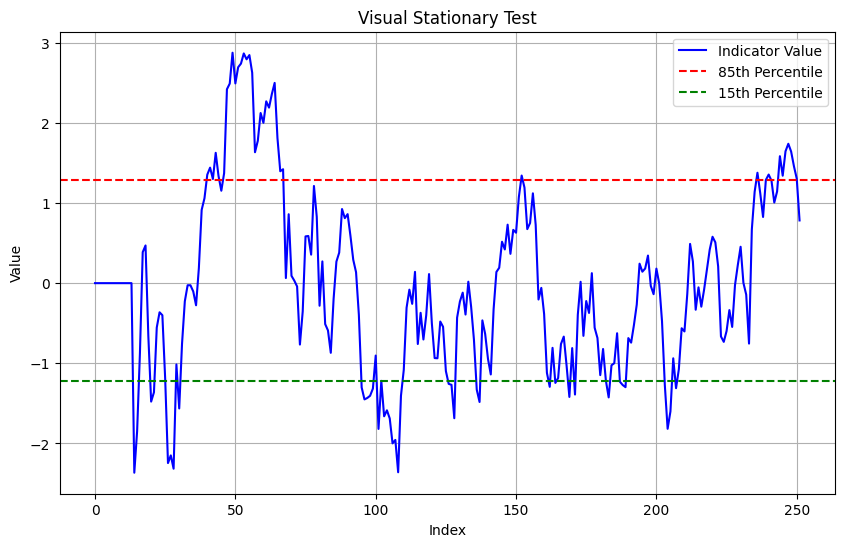

STATIONARY @ 5% CONFIDENCE LEVEL
STRONG EVIDENCE OF STATIONARITY
----------------------------------------
NOT NORMAL @ 5% CONFIDENCE LEVEL
----------------------------------------
Relative Entropy: 0.8960575178796095
EXCELLENT
----------------------------------------
3.7447170937119303
PASSABLE DISTRIBUTION - SOME OUTLIERS - INSPECT VISUALLY
----------------------------------------
NMI @ lag 1 = 0.39478515863384517
NMI @ lag 2 = 0.29869394809536165
NMI @ lag 3 = 0.2445382249251896
NMI @ lag 4 = 0.22380101841893574
NMI @ lag 5 = 0.18904465395146933
NMI @ lag 6 = 0.1971175228761968
NMI @ lag 7 = 0.21042677475674754
NMI @ lag 8 = 0.17185864776914359
NMI @ lag 9 = 0.1522922791884363
NMI @ lag 10 = 0.1314757104736974


In [8]:
jjq.rsi(jjq.df).indicator_evaluation_report()

In [9]:
jjq.feature_evaluator.parallel_indicator_distribution_study(jjq.rsi)

{'ADF Test': np.float64(0.6),
 'Jarque-Bera Test': np.float64(0.6),
 'Relative Entropy': np.float64(0.9),
 'Range-IQR Ratio': np.float64(3.36)}

### Applying triple barrier labels

In [26]:
jjq.add_labels(span=2, pt_sl=1, n_days=2)

In [27]:
jjq.df['bin'].value_counts()

bin
 0.0    116
 1.0     80
-1.0     54
Name: count, dtype: int64

In [28]:
jjq.df

,date,Open,High,Low,Close,Volume,average,barCount,RSI,hit_date,bin,returns
date,,,,,,,,,,,,
2020-03-13,2020-03-13,22.19,24.25,21.48,24.16,108516483.0,22.505,355513,0.000000,NaT,NaN,NaN
2020-03-16,2020-03-16,19.90,21.73,19.58,20.44,100121643.0,20.758,292861,0.000000,NaT,NaN,NaN
2020-03-17,2020-03-17,21.06,22.69,20.03,21.98,102291271.0,21.356,318163,0.000000,2020-03-18,-1.0,-0.054140
2020-03-18,2020-03-18,20.36,20.97,19.70,20.79,132584850.0,20.213,397375,0.000000,2020-03-20,0.0,-0.053872
2020-03-19,2020-03-19,20.26,21.75,19.00,21.20,111195358.0,20.657,341297,0.000000,2020-03-20,-1.0,-0.072170
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-08,2021-03-08,37.38,37.73,36.82,37.13,52338707.0,37.301,170884,2.270147,2021-03-09,-1.0,-0.021815
2021-03-09,2021-03-09,36.55,37.16,35.81,36.32,52967269.0,36.537,172031,1.046144,2021-03-10,1.0,0.028910
2021-03-10,2021-03-10,36.51,37.53,36.37,37.37,45571703.0,37.167,146260,1.825551,2021-03-12,1.0,0.015253
